<a href="https://colab.research.google.com/github/Lokeshdawkare/Lokeshdawkare/blob/main/Janitri_DataScience_Challenge_FHR_and_UC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
import numpy as np

In [23]:

# Load the dataset
data = pd.read_csv('/content/Simulator_readings.csv')

# Display the first few rows
print(data.head())

   Time(ms)  Fhr1(BPM)  Fhr2(BPM)  Uc(TOCO)
0       250        126          0         9
1       500        126          0         9
2       750        126          0        10
3      1000        126          0        10
4      1250        126          0        10


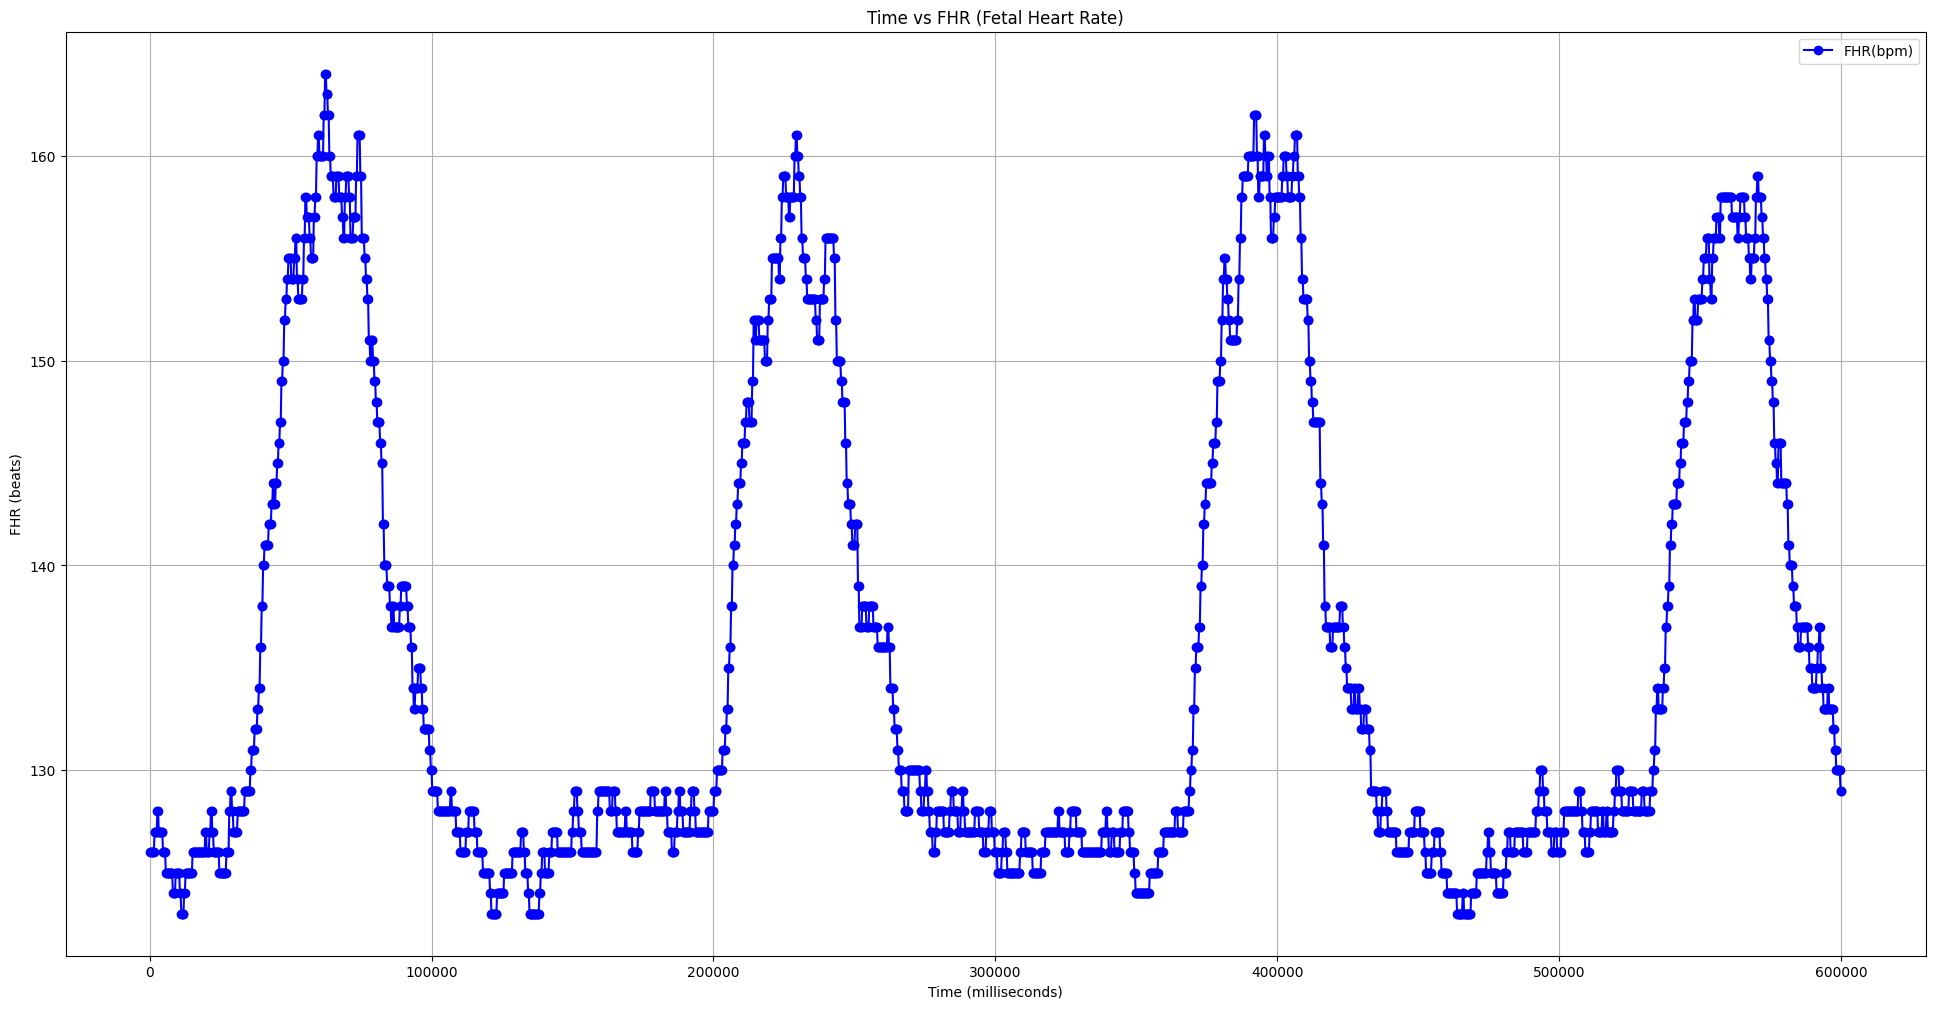

In [27]:
# Step 2: Plot Time vs FHR (Fetal Heart Rate)
plt.figure(figsize=(24, 12))
plt.plot(data['Time(ms)'], data['Fhr1(BPM)'], label='FHR(bpm)', color='blue', marker='o')
plt.title('Time vs FHR (Fetal Heart Rate)')
plt.xlabel('Time (milliseconds)')
plt.ylabel('FHR (beats)')
plt.grid(True)
plt.legend()
plt.show()

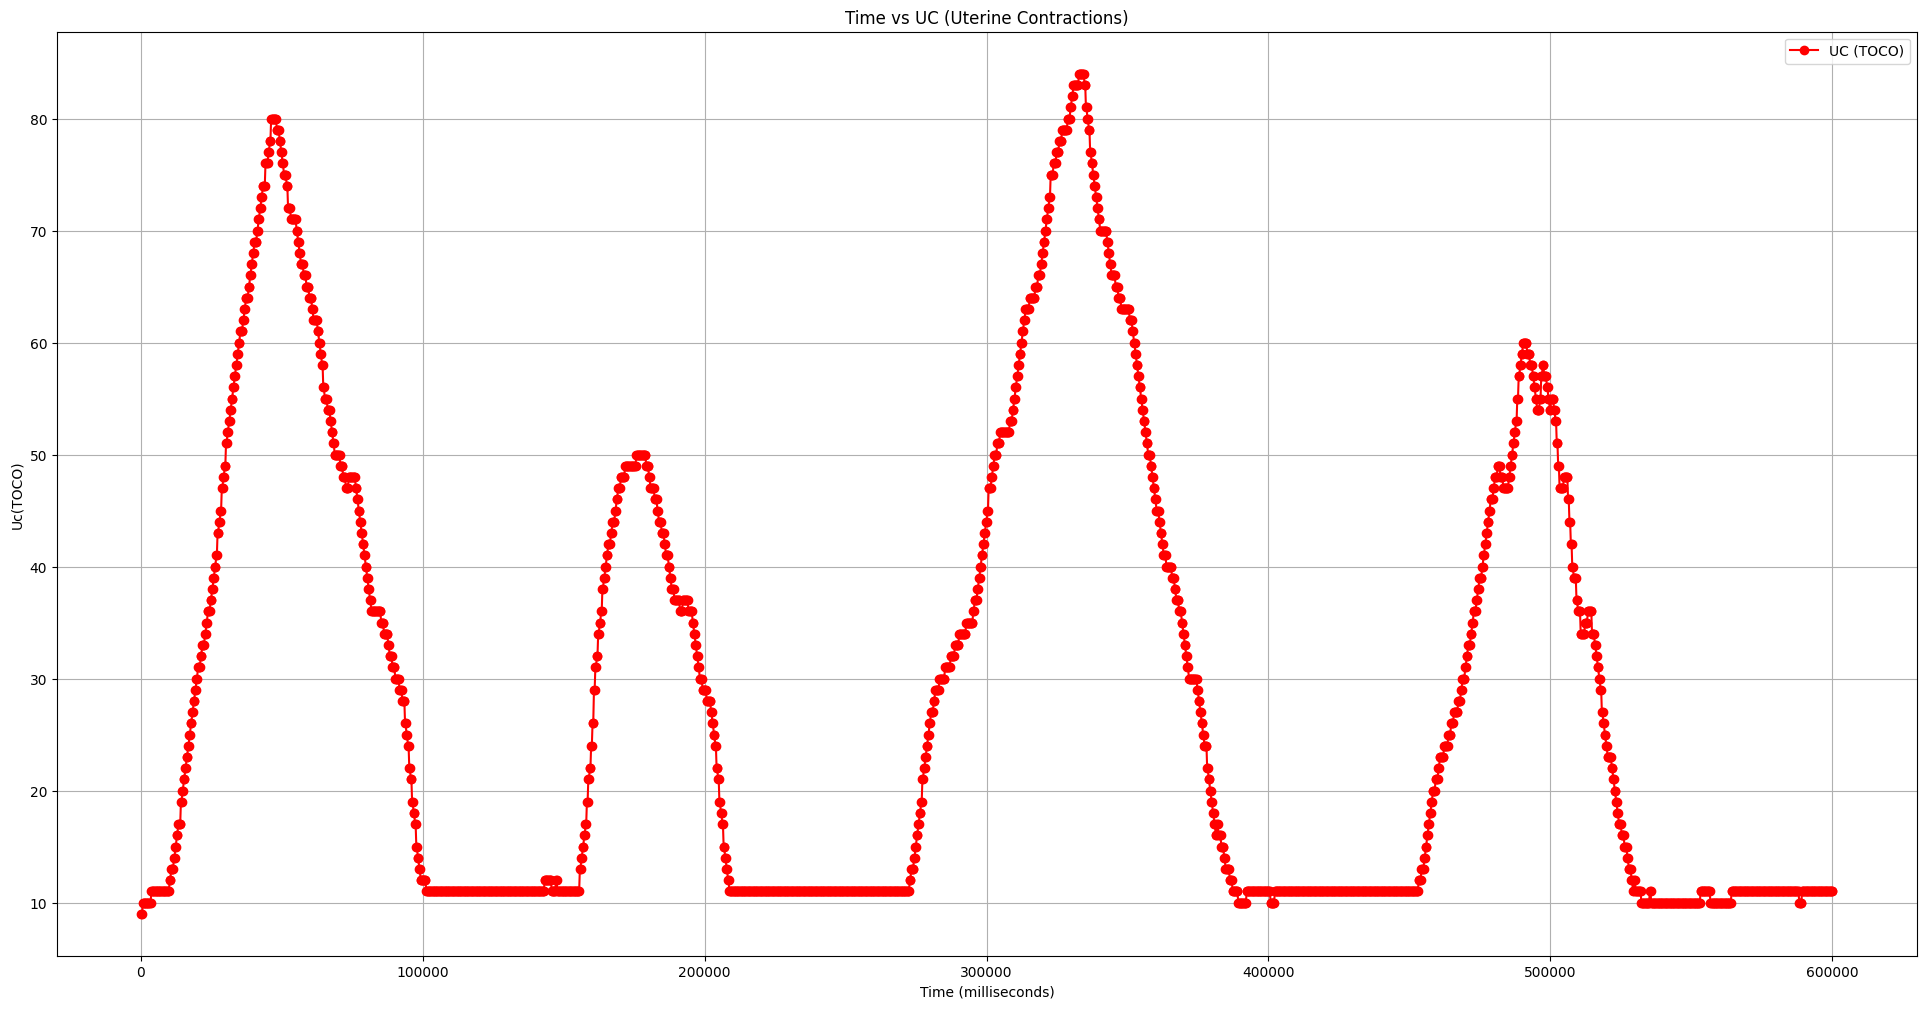

In [26]:
# Step 3: Plot Time vs UC (Uterine Contractions)
plt.figure(figsize=(24, 12))
plt.plot(data['Time(ms)'], data['Uc(TOCO)'], label='UC (TOCO)', color='red', marker='o')
plt.title('Time vs UC (Uterine Contractions)')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Uc(TOCO)')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# Epoch duration in milliseconds
epoch_duration_ms = 3750
# Number of data points per epoch
points_per_epoch = epoch_duration_ms // 250

# Calculate averages for each epoch
fhr_epoch_analysis = []

for i in range(0, len(data), points_per_epoch):
    epoch_data = data['Fhr1(BPM)'][i:i + points_per_epoch]
    if len(epoch_data) == points_per_epoch:
        avg_fhr = epoch_data.mean()
        pulse_interval_ms = (60 / avg_fhr) * 1000  # Convert bpm to pulse interval in ms
        fhr_epoch_analysis.append((avg_fhr, pulse_interval_ms))

# Convert to DataFrame for easier handling
fhr_epoch_df = pd.DataFrame(fhr_epoch_analysis, columns=['Average FHR (bpm)', 'Pulse Interval (ms)'])


In [30]:
print(fhr_epoch_df)

     Average FHR (bpm)  Pulse Interval (ms)
0           126.733333           473.435034
1           125.666667           477.453581
2           124.466667           482.056776
3           124.466667           482.056776
4           126.000000           476.190476
..                 ...                  ...
155         138.466667           433.317285
156         136.600000           439.238653
157         135.000000           444.444444
158         133.533333           449.326011
159         130.866667           458.481915

[160 rows x 2 columns]


In [34]:
# Detect peaks in UC
peaks, properties = find_peaks(data['Uc(TOCO)'], height=0, width=0)  # Added width=0 to calculate peak widths
peak_widths = properties['widths'] * 250 / 1000  # Convert widths from indices to seconds

# Count peaks with width greater than 30 seconds
wide_peaks_count = np.sum(peak_widths > 30)

# Calculate average duration of these wide peaks
average_duration_wide_peaks = np.mean(peak_widths[peak_widths > 30]) if wide_peaks_count > 0 else 0

# Summary of UC peak analysis
print(f'Number of UC peaks wider than 30 seconds: {wide_peaks_count}')
print(f'Average duration of UC peaks wider than 30 seconds: {average_duration_wide_peaks:.2f} seconds')

Number of UC peaks wider than 30 seconds: 4
Average duration of UC peaks wider than 30 seconds: 45.34 seconds
